In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./train.p",mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./test.p",mode = 'rb') as test_data:
    test = pickle.load(test_data)
with open("./valid.p",mode = 'rb') as valid_data:
    valid = pickle.load(valid_data)

In [3]:
X_train,y_train = train['features'], train['labels']
X_validation,y_validation = valid['features'], valid['labels']
X_test,y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Image Exploration

23

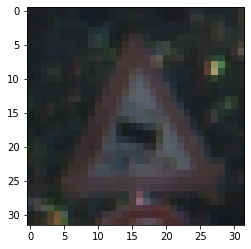

In [10]:
i = 2000
plt.imshow(X_train[i])
y_train[i]

1

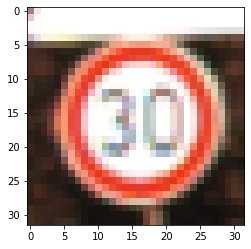

In [11]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

37

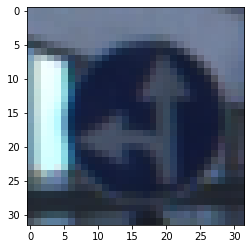

In [12]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

11

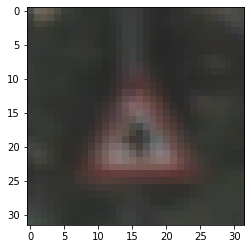

In [13]:
i = 9000
plt.imshow(X_train[i])
y_train[i]

1

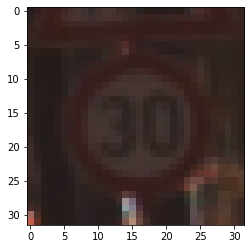

In [14]:
i = 2500
plt.imshow(X_train[i])
y_train[i]

38

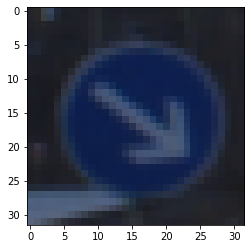

In [15]:
i = 2000
plt.imshow(X_validation[i])
y_validation[i]

34

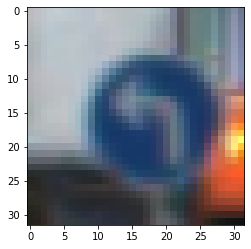

In [16]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

# Data Preparation

In [17]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [18]:
X_train_gray = np.sum(X_train/3, axis = 3,keepdims = True)

In [19]:
X_train_gray.shape # converting in gray scale

(34799, 32, 32, 1)

In [20]:
X_test_gray = np.sum(X_test/3, axis = 3,keepdims = True)

In [21]:
X_validation_gray = np.sum(X_validation/3, axis = 3,keepdims = True)

In [22]:
X_test_gray.shape

(12630, 32, 32, 1)

In [23]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [24]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

3

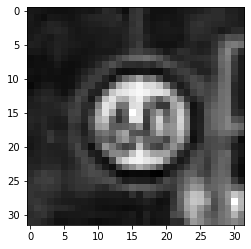

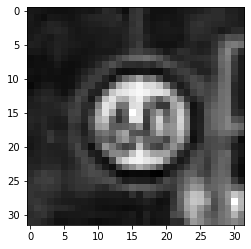

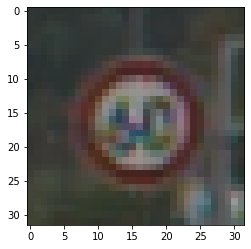

In [25]:
i = 1000
plt.imshow(X_train_gray_norm[i].squeeze(),cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray[i].squeeze(),cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
y_train[i]


# Model Training

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5),activation = 'relu',input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5),activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120,activation = 'relu'))
cnn_model.add(Dense(units = 84,activation = 'relu'))
cnn_model.add(Dense(units = 43,activation = 'softmax'))




In [28]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(lr = 0.001),metrics = ['accuracy'])

In [29]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             epochs = 50,
             verbose = 1,
              validation_data= (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 13s 189ms/step - loss: 3.1320 - accuracy: 0.1904 - val_loss: 2.5448 - val_accuracy: 0.3587
Epoch 2/50
70/70 [==============================] - 14s 195ms/step - loss: 1.6082 - accuracy: 0.5643 - val_loss: 1.3981 - val_accuracy: 0.6082
Epoch 3/50
70/70 [==============================] - 14s 204ms/step - loss: 0.9073 - accuracy: 0.7446 - val_loss: 1.0188 - val_accuracy: 0.7098
Epoch 4/50
70/70 [==============================] - 14s 198ms/step - loss: 0.6430 - accuracy: 0.8220 - val_loss: 0.9025 - val_accuracy: 0.7404
Epoch 5/50
70/70 [==============================] - 15s 211ms/step - loss: 0.5093 - accuracy: 0.8626 - val_loss: 0.7865 - val_accuracy: 0.7737
Epoch 6/50
70/70 [==============================] - 16s 223ms/step - loss: 0.4212 - accuracy: 0.8879 - val_loss: 0.7870 - val_accuracy: 0.7805
Epoch 7/50
70/70 [==============================] - 17s 236ms/step - loss: 0.3680 - accuracy: 0.9013 - val_loss: 0.7488 - val_accuracy: 0.7812

In [30]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.3375 - accuracy: 0.8671
Test Accuracy:0.8670625686645508


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

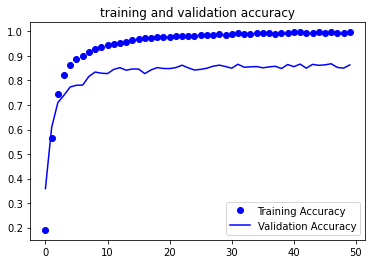

In [37]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo', label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b-', label = 'Validation Accuracy')
plt.title('training and validation accuracy')
plt.legend()


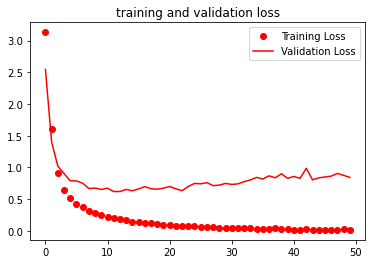

In [39]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro', label = 'Training Loss')
plt.plot(epochs,val_loss,'r-', label = 'Validation Loss')
plt.title('training and validation loss')
plt.legend()

In [40]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
y_true = y_test
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(predicted_classes,y_true)


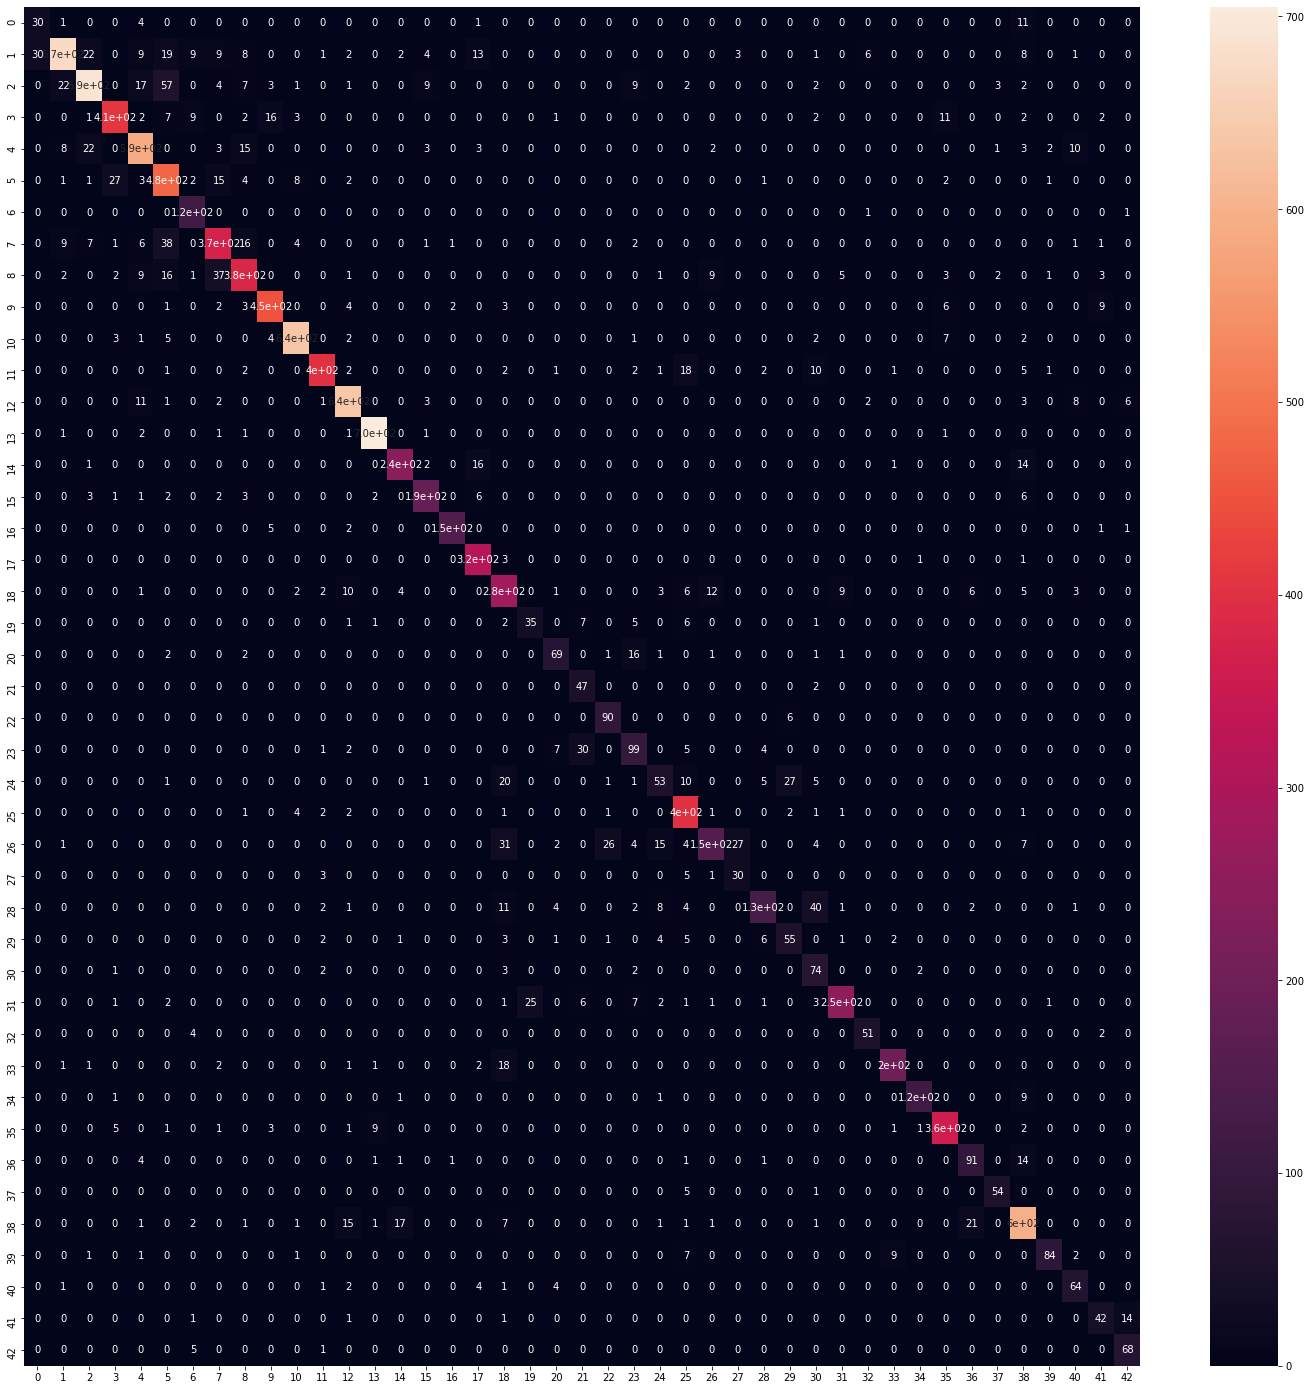

In [46]:
plt.figure(figsize = (25,25))
sns.heatmap(cn,annot = True)

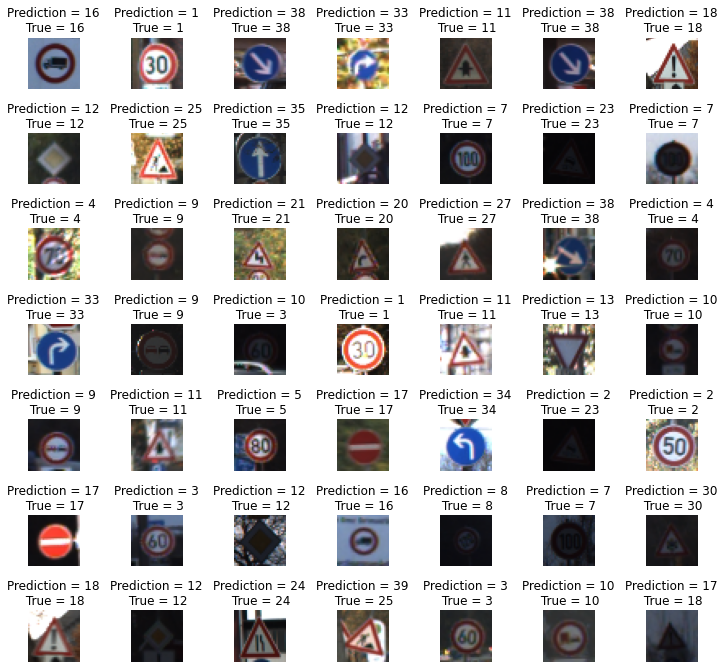

In [55]:
L = 7
W = 7
import numpy as np
fix,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)